# Broker Dealer Series

We will propose a relevant and exhaustive market risk analysis of a Broker Dealer.

## 1. Import Libraries

In [4]:
! pip install numba
import yfinance as yf
import pandas as pd
import numpy as np
import Series_Functions as sf
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2

sns.set(rc={"figure.figsize":(15, 8)},style="whitegrid")
plt.rcParams['font.family'] = 'serif'

## 2. Download the Data

In [9]:
# This is the ticker we choose to analyze
ticker = 'IAI'
# We use the function get_data to get the data from Yahoo Finance
prices = sf.get_data(ticker)

We compute the returns using the function get_returns from Series_Functions package.

In [10]:
returns = sf.get_returns(prices)

In [14]:
returns.head()

Date
2007-01-04 00:00:00-05:00   -0.000183
2007-01-05 00:00:00-05:00   -0.002206
2007-01-08 00:00:00-05:00    0.014186
2007-01-09 00:00:00-05:00    0.005631
2007-01-10 00:00:00-05:00    0.019147
Name: Close, dtype: float64

We plot the returns for the Broker Dealer using the function plot_returns.

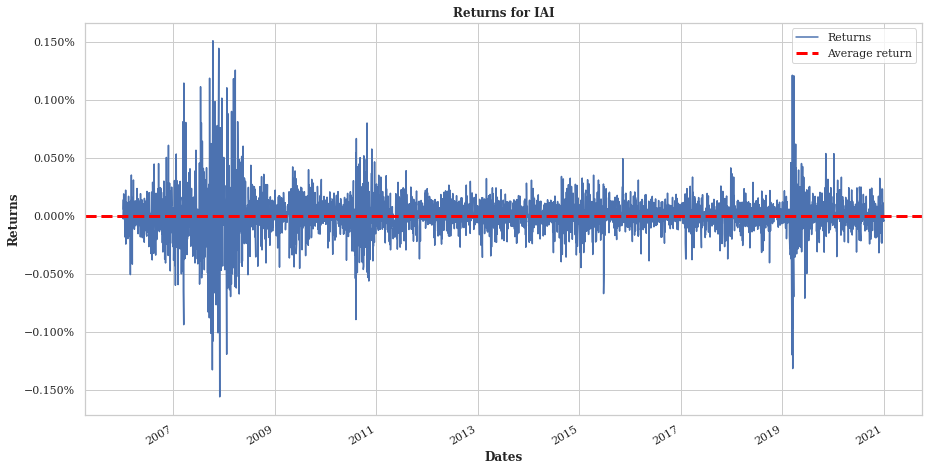

In [22]:
sf.plot_returns(returns, ticker)

## 3. Estimation of the VaR

### a. Non parametric method

We are computing the VaR using the non parametric method called Exponentially Weighted Historical Simulation (EWHS) with a rolling window. In order to proceed we use the function weighted_hs_var in the Series_Functions package.

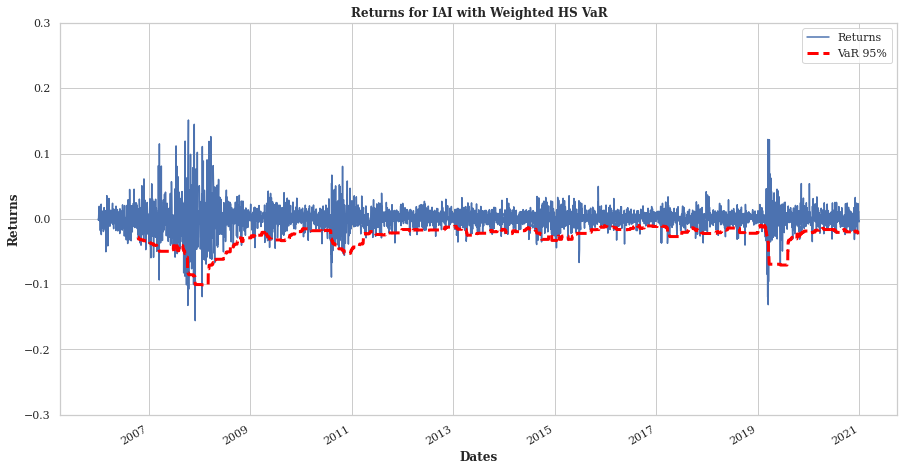

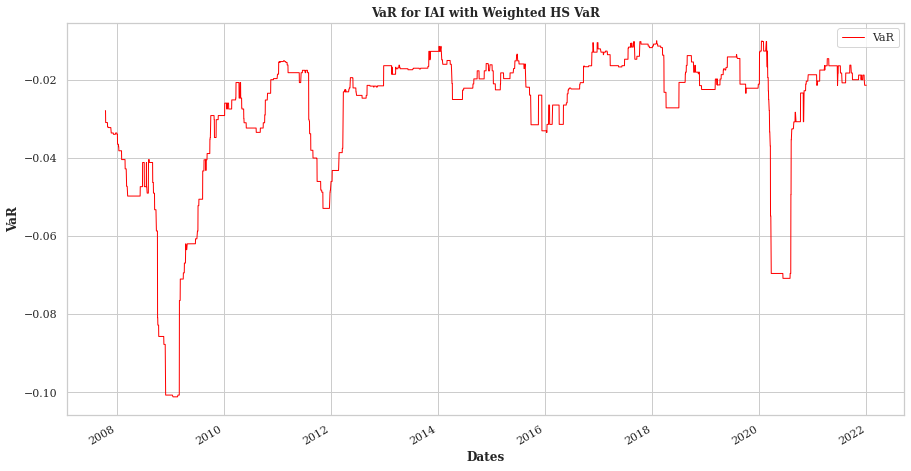

In [27]:
VaR_NonParam = sf.weighted_hs_var(returns=returns,confidence_level=95,window=100,ticker=ticker)

If we are using a bigger window, the VaR will be more and more smoothed and constant.

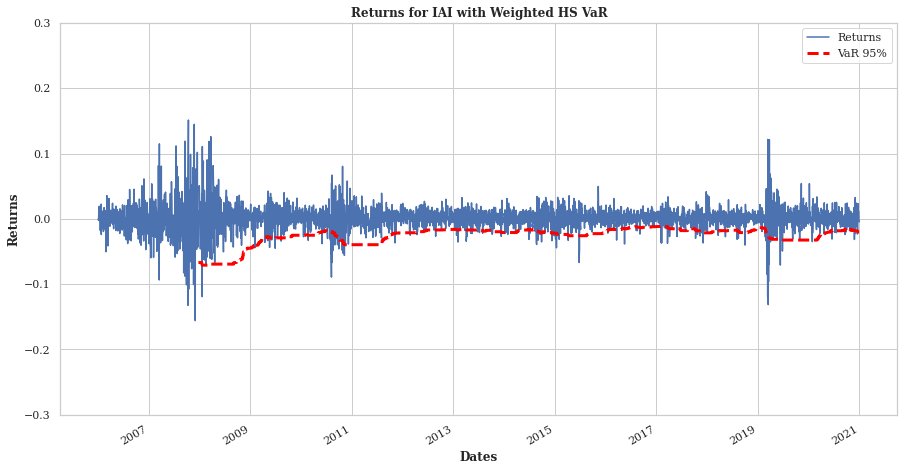

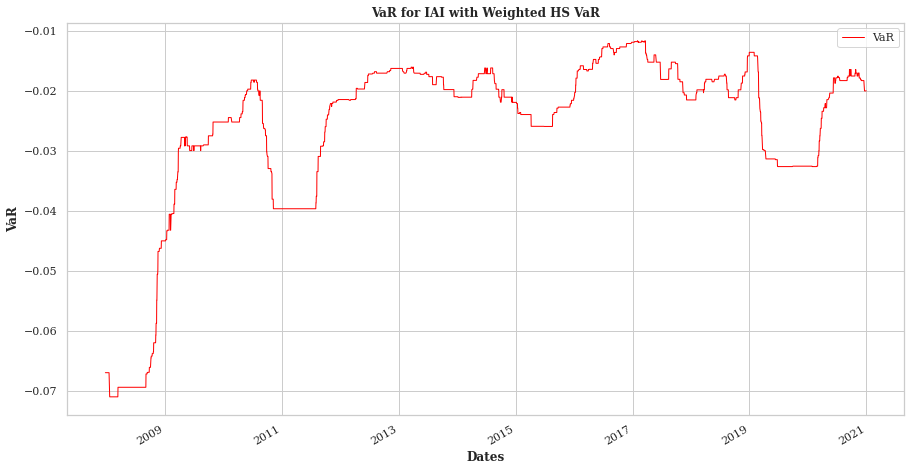

In [28]:
VaR_NonParam = sf.weighted_hs_var(returns=returns,confidence_level=95,window=250,ticker=ticker)

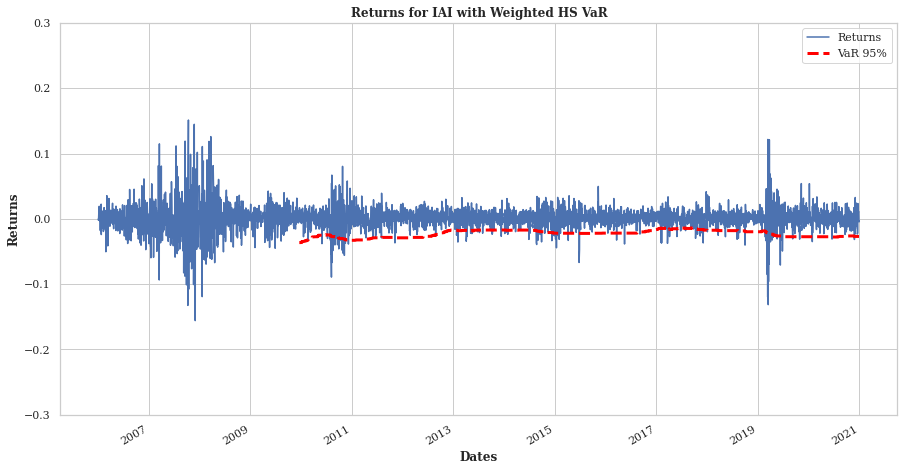

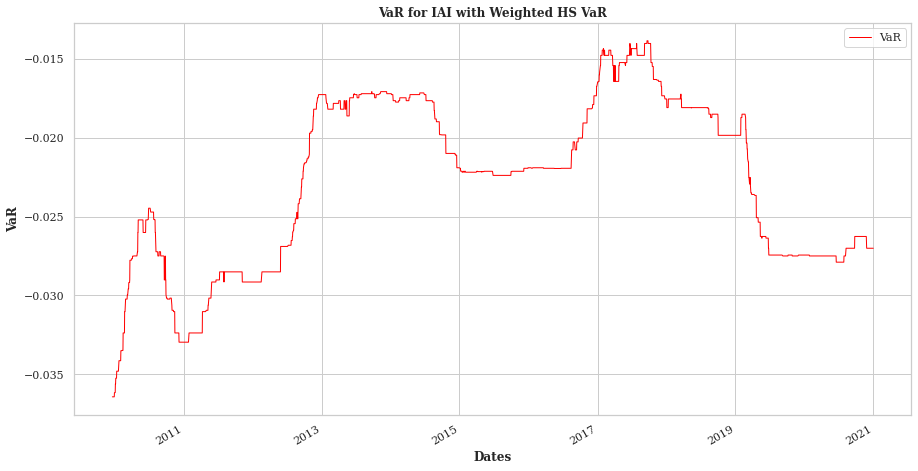

In [29]:
VaR_NonParam = sf.weighted_hs_var(returns=returns,confidence_level=95,window=500,ticker=ticker)

### b. Parametric method

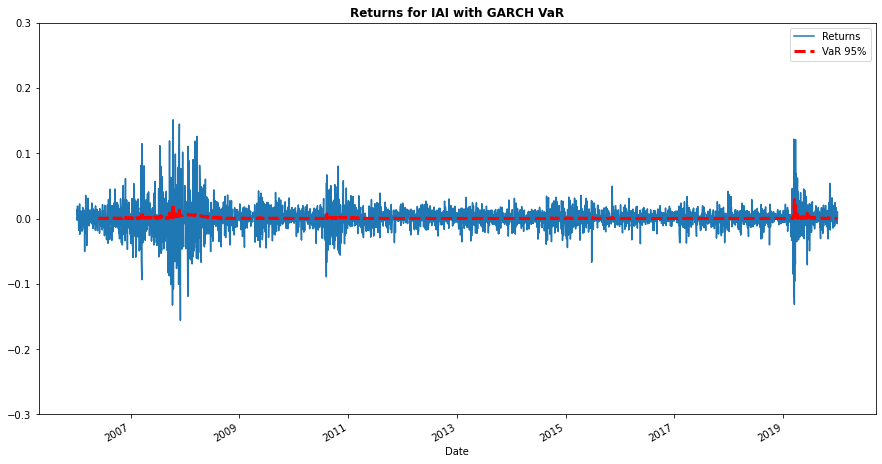

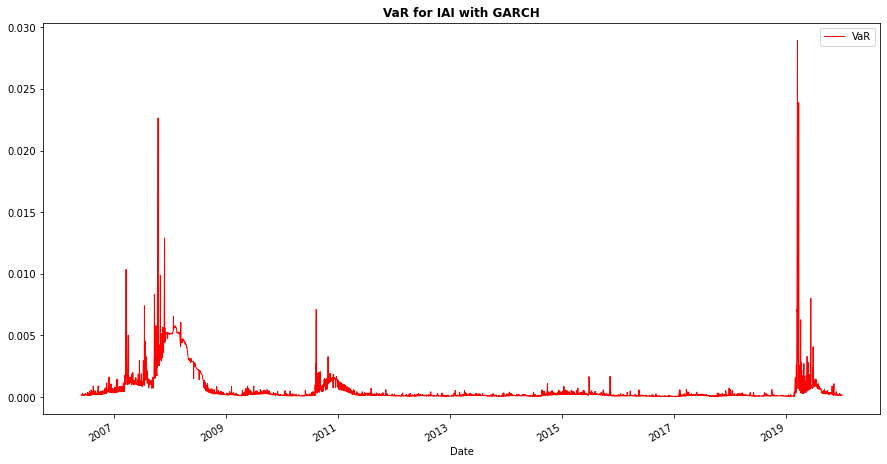

In [6]:
p,q = sf.optimize_garch(returns=returns, bounds=[9,9])
VaR_Param = sf.garch_var(returns=returns, confidence_level=95, p=p, q=q, ticker=ticker)

## Expected shortfall

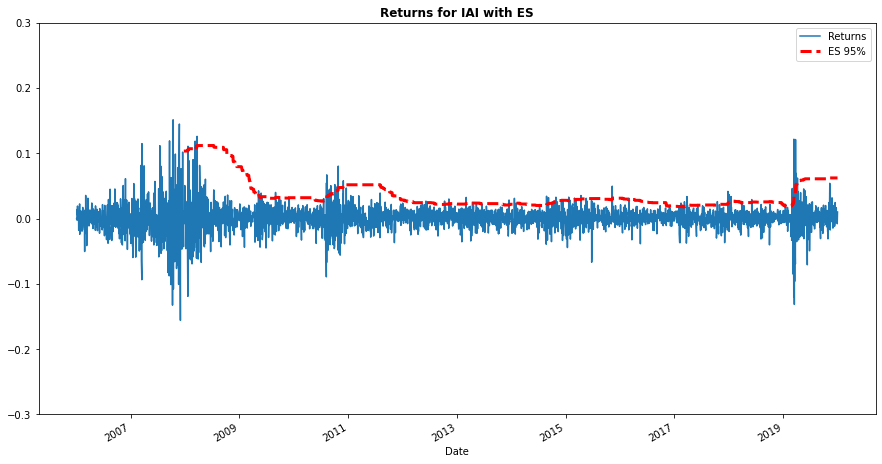

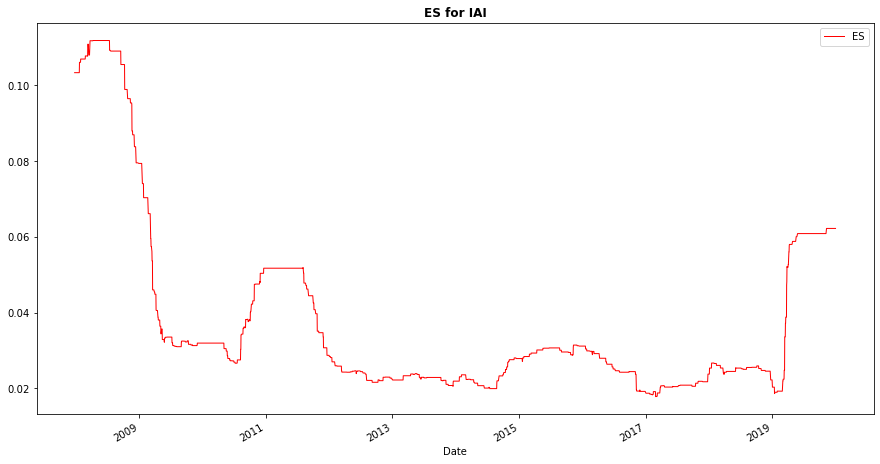

In [7]:
Es = sf.expected_shortfall(returns=returns, confidence_level=95, window=250, ticker=ticker)